In [1]:
import riskModelBuilder as rmb
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import preprocessing as skpre
from matplotlib import pyplot as plt
import seaborn as sb

In [12]:
min_set = [
    'index',
    'addedroadt',
    'accesscont',
    'adtderivat',
    'adtstation',
    'adtyear',
    'assigned_1',
    'assignedle',
    'city',
    'county',
    'crn',
    'curbs',
    'dateactive',
    'equation_1',
    'equationro',
    'facilityty',
    'federalaid',
    'fromcity',
    'fromendtyp',
    'frommeasur',
    'fromstate',
    'fromstreet',
    'functional',
    'futurefaci',
    'hpmscode',
    'hpmssample',
    'iri',
    'iriyear',
    'iristatus',
    'item_id',
    'jurisdicti',
    'leftshou_1',
    'leftshould',
    'leftsidewa',
    'lifecycles',
    'massdothig',
    'mhs',
    'mileagecou',
    'mpo',
    'municipals',
    'naccidents',
    'nhsstatus',
    'numberofpe',
    'opposingdi',
    'oppositenu',
    'psi',
    'psiyear',
    'rightsho_1',
    'rightshoul',
    'rightsidew',
    'rpa',
    'roadinvent',
    'roadsegmen',
    'routedirec',
    'routefrom',
    'routequali',
    'routekey',
    'routenumbe',
    'routesyste',
    'routeto',
    'routetype',
    'urbanizeda',
    'undivide_1',
    'undividedl',
    'shape_len',
    'speedlimit',
    'streetlist',
    'streetna_1',
    'streetname',
    'streetoper',
    'subroute',
    'surfacetyp',
    'surfacewid',
    'tocity',
    'toendtype',
    'tollroad',
    'tomeasure',
    'tostate',
    'tostreetna',
    'trucknetwo',
    'truckroute']

In [29]:
min_set = [
    'naccidents',
    'adt'
]

In [7]:
mb.table.columns

Index(['assignedle', 'federalfun', 'mediantype', 'medianwidt', 'numberoftr',
       'rightofway', 'structural', 'terrain', 'urbantype', 'acc_risk'],
      dtype='object')

In [30]:
# Gather all data and do some cleaning

mb = rmb.Alldata('roadInventory', 'segments_full')
mb.getData()
mb.cleanData(todrop=min_set)

In [37]:
# Perform a random forest regression 

trainer = rmb.Model()

y = mb.traindata[:,-1]
X = mb.traindata[:,:-1]

n_estimators = 100
test_frac = 0.4
score, oob_score, rf_pred, y_test= trainer.rf_regression(X, y, n_estimators, test_frac)
pred_max = np.max(rf_pred)

In [32]:
mb.traindata.shape

(58522, 394)

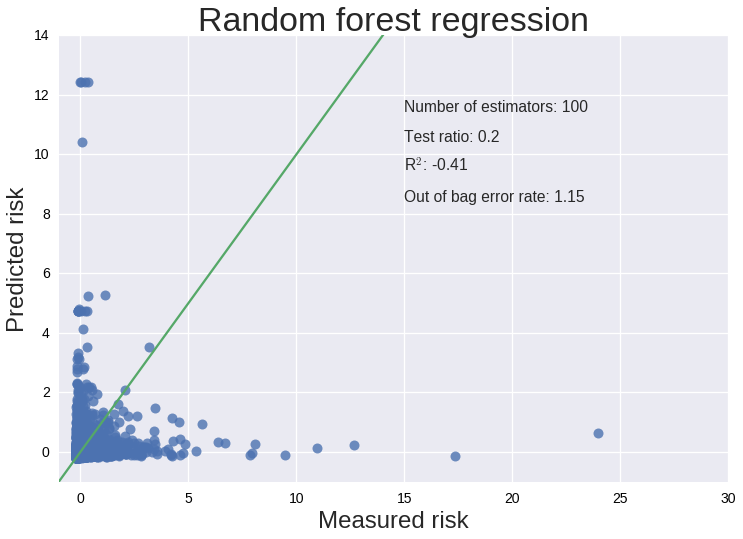

In [15]:
fig = sb.regplot(y_test, rf_pred, fit_reg=False, scatter_kws={"s":100})
import seaborn as sb
sb.set_context('talk')
fig.set(ylim=[-1, None], xlim=[-1, None])

# Set the size of the graph from here
fig.figure.set_size_inches(12,8)
# Set the Title of the graph from here
fig.axes.set_title('Random forest regression', fontsize=34)
# Set the xlabel of the graph from here
fig.set_xlabel("Measured risk",size = 24)
# Set the ylabel of the graph from here
fig.set_ylabel("Predicted risk",size = 24)
# Set the ticklabel size and color of the graph from here
fig.tick_params(labelsize=14,labelcolor="black")

fig.text(15, pred_max-1, 'Number of estimators: {0}'.format(n_estimators))
fig.text(15, pred_max-2, 'Test ratio: {0}'.format(test_frac))
fig.text(15, pred_max-3, r'R$^2$: {0}'.format(round(score,2)))
fig.text(15, pred_max-4, 'Out of bag error rate: {0}'.format(round(1-oob_score,2)))

fig.plot(np.linspace(-5,50, 1000), np.linspace(-5, 50, 1000))

plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/rf_reg2.png', dpi=300)

KeyboardInterrupt: 

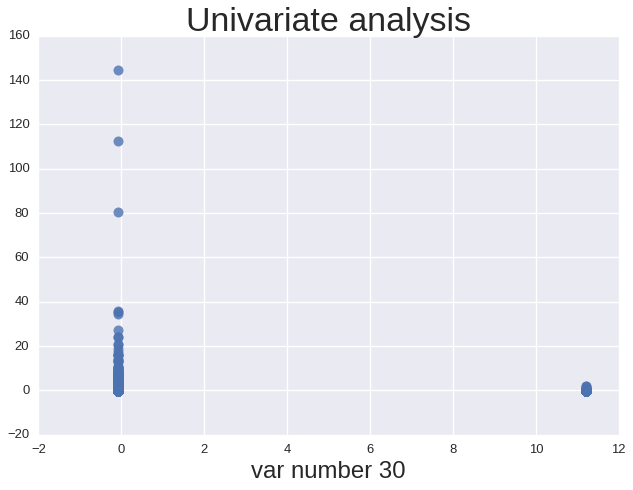

In [36]:
# Perform an univariate analysis to look for linearities

for i in range(0,mb.test.shape[1]-1):
    n = plt.figure(i)
    fig = sb.regplot(X[:,i], y, fit_reg=False, scatter_kws={"s":100})
    fig.axes.set_title('Univariate analysis', fontsize=34)
    fig.set_xlabel("var number {0}".format(str(i)),size = 24)
    fig.set_ylabel("",size = 24)
    plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/uva{0}.png'.format(str(i)), dpi=150)
    plt.close()

In [35]:
np.std(mb.test, axis=0)

array([  2.68769852e-01,   2.30177871e-01,   1.47489213e-01,
         1.34710574e-01,   1.10083444e-01,   4.74391658e-02,
         4.29191578e-02,   9.24287051e-03,   4.13367863e-03,
         1.24001882e-02,   4.19156796e-02,   1.01249708e-02,
         4.76571723e-01,   3.20704777e-01,   4.99058328e-01,
         6.45672777e-02,   4.76305165e-01,   1.06619416e-01,
         6.48291695e-02,   1.28059948e-01,   4.85460865e-01,
         2.20080640e-01,   3.04432195e-01,   2.22675977e-01,
         4.92580935e-01,   2.00709102e-01,   2.15454192e-01,
         4.99948245e-01,   8.26714535e-03,   4.56107464e-02,
         8.85943674e-02,   1.65674269e-01,   4.13367863e-03,
         2.67799133e-02,   1.98206996e-02,   5.59842056e-02,
         1.18454032e-01,   1.70412635e-02,   1.75351657e-02,
         2.67799133e-02,   1.75351657e-02,   1.43181370e-02,
         8.97258404e-02,   1.62626133e-01,   1.51685648e-01,
         4.19098506e-01,   4.48905398e-01,   3.47056513e-01,
         5.90820231e-02,